In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.7 MB

In [34]:
from pycaret.datasets import get_data
from pycaret.classification import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [35]:
all_datasets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [36]:
df = get_data('blood')

df.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>],
       [<Axes: title={'center': 'Monetary'}>,
        <Axes: title={'center': 'Time'}>],
       [<Axes: title={'center': 'Class'}>, <Axes: >]], dtype=object)

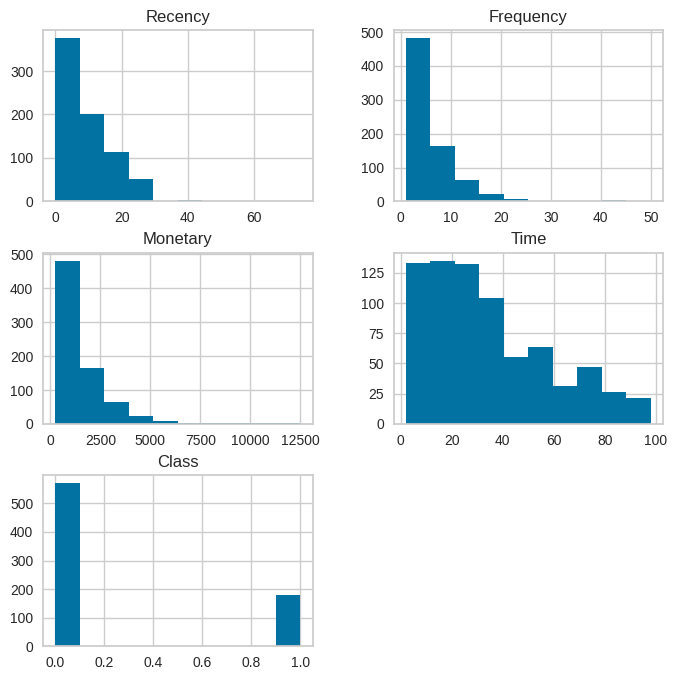

In [37]:
df.hist(figsize = (8, 8))

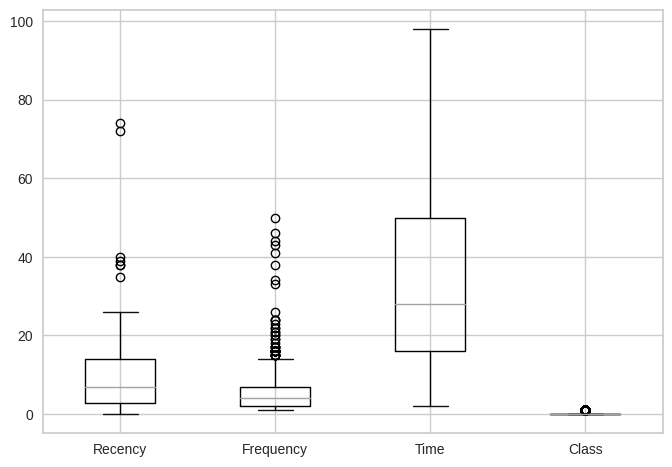

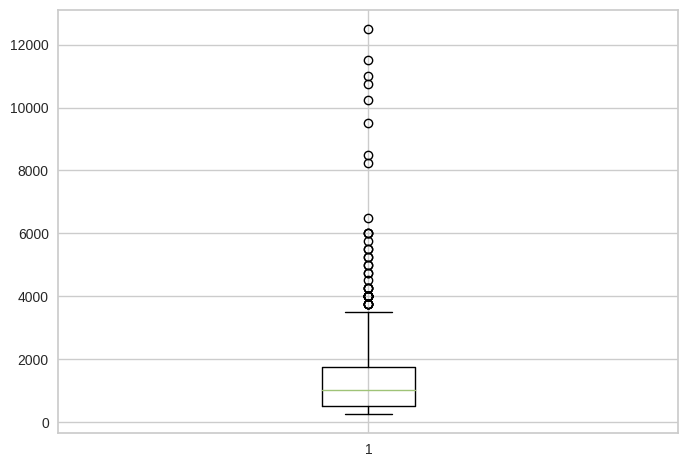

In [38]:
df.drop('Monetary', axis = 1).boxplot()
plt.show()

plt.boxplot(df['Monetary'])
plt.show()

<Axes: >

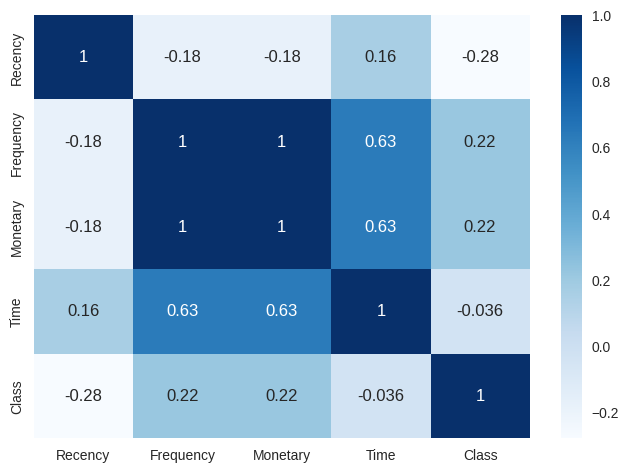

In [39]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

<Axes: >

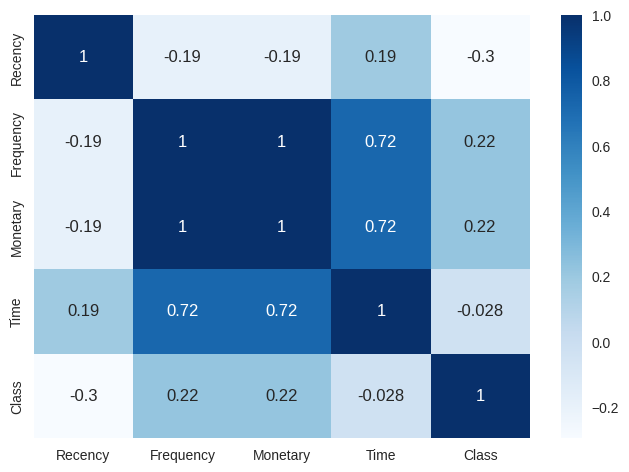

In [40]:
sns.heatmap(df.corr(method = 'spearman'), annot = True, cmap = 'Blues')

In [41]:
s = setup(df, target = 'Class', session_id = 1212)

,Description,Value
0,Session id,1212
1,Target,Class
2,Target type,Binary
3,Original data shape,"(748, 5)"
4,Transformed data shape,"(748, 5)"
5,Transformed train set shape,"(523, 5)"
6,Transformed test set shape,"(225, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [42]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7706,0.7321,0.0801,0.5500,0.1377,0.0916,0.1530,0.0330
ada,Ada Boost Classifier,0.7705,0.6721,0.2321,0.6046,0.3161,0.2088,0.2509,0.1270
ridge,Ridge Classifier,0.7687,0.0000,0.0487,0.5500,0.0890,0.0600,0.1225,0.0280
gbc,Gradient Boosting Classifier,0.7667,0.6712,0.2885,0.5442,0.3678,0.2408,0.2640,0.1360
lr,Logistic Regression,0.7648,0.7394,0.0878,0.5400,0.1466,0.0872,0.1419,0.0420
dummy,Dummy Classifier,0.7630,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0440
nb,Naive Bayes,0.7516,0.6976,0.1865,0.4475,0.2567,0.1404,0.1615,0.0310
rf,Random Forest Classifier,0.7340,0.6398,0.2949,0.4213,0.3396,0.1811,0.1893,0.3040
lightgbm,Light Gradient Boosting Machine,0.7322,0.6664,0.2622,0.3941,0.3101,0.1546,0.1612,0.2020
xgboost,Extreme Gradient Boosting,0.7263,0.6471,0.2635,0.3964,0.3122,0.1502,0.1576,0.0620


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [43]:
df = df.drop('Monetary', axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Time       748 non-null    int64
 3   Class      748 non-null    int64
dtypes: int64(4)
memory usage: 23.5 KB


In [44]:
s = setup(df, target = 'Class', session_id = 1212)
best = compare_models()

,Description,Value
0,Session id,1212
1,Target,Class
2,Target type,Binary
3,Original data shape,"(748, 4)"
4,Transformed data shape,"(748, 4)"
5,Transformed train set shape,"(523, 4)"
6,Transformed test set shape,"(225, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.7706,0.7376,0.1615,0.5050,0.2402,0.1572,0.1941,0.0330
lda,Linear Discriminant Analysis,0.7706,0.7321,0.0801,0.5500,0.1377,0.0916,0.1530,0.0440
ada,Ada Boost Classifier,0.7705,0.6721,0.2321,0.6046,0.3161,0.2088,0.2509,0.1230
ridge,Ridge Classifier,0.7687,0.0000,0.0487,0.5500,0.0890,0.0600,0.1225,0.0290
gbc,Gradient Boosting Classifier,0.7686,0.6699,0.2885,0.5542,0.3693,0.2445,0.2693,0.2800
nb,Naive Bayes,0.7668,0.7289,0.1532,0.5483,0.2299,0.1437,0.1870,0.0310
lr,Logistic Regression,0.7648,0.7394,0.0878,0.5400,0.1466,0.0872,0.1419,0.0370
dummy,Dummy Classifier,0.7630,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0290
rf,Random Forest Classifier,0.7416,0.6478,0.2782,0.4226,0.3280,0.1807,0.1886,0.2080
knn,K Neighbors Classifier,0.7360,0.6591,0.3295,0.4254,0.3690,0.2068,0.2102,0.0500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [45]:
from sklearn.utils import resample

df['Class'].value_counts()

0    570
1    178
Name: Class, dtype: int64

(array([570.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 570.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

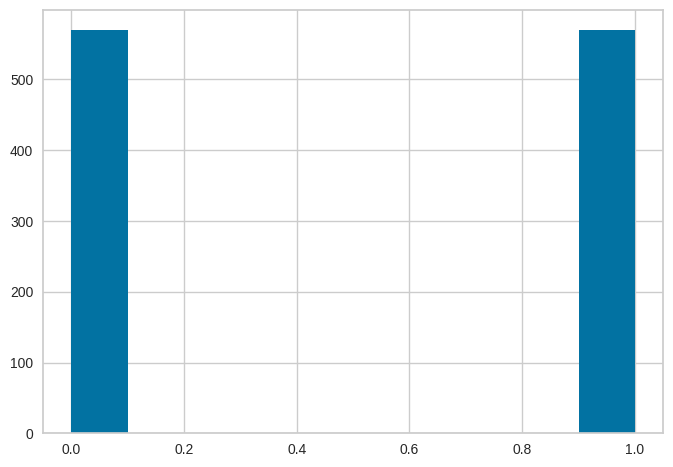

In [46]:
df_majority = df[(df['Class'] == 0)]
df_minority = df[(df['Class'] == 1)]

df_minority_upsampled = resample(df_minority, replace = True, n_samples = 570)

df = pd.concat([df_minority_upsampled, df_majority])

plt.hist(df['Class'])

In [48]:
s = setup(df, target = 'Class', session_id = 1212, index = False)
best = compare_models()

,Description,Value
0,Session id,1212
1,Target,Class
2,Target type,Binary
3,Original data shape,"(2876, 4)"
4,Transformed data shape,"(2876, 4)"
5,Transformed train set shape,"(2013, 4)"
6,Transformed test set shape,"(863, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9339,0.9533,0.9913,0.9308,0.9601,0.7689,0.7827,0.2070
rf,Random Forest Classifier,0.9315,0.9514,0.9926,0.9272,0.9587,0.7579,0.7741,0.3440
dt,Decision Tree Classifier,0.9255,0.8702,0.9907,0.9223,0.9553,0.7343,0.7521,0.0320
xgboost,Extreme Gradient Boosting,0.9220,0.9243,0.9913,0.9181,0.9533,0.7193,0.7402,0.0690
lightgbm,Light Gradient Boosting Machine,0.9175,0.9240,0.9889,0.9153,0.9506,0.7036,0.7243,0.5170
gbc,Gradient Boosting Classifier,0.8813,0.8707,0.9858,0.8808,0.9302,0.5400,0.5837,0.1720
knn,K Neighbors Classifier,0.8768,0.8447,0.9740,0.8845,0.9269,0.5391,0.5699,0.1380
ada,Ada Boost Classifier,0.8500,0.8253,0.9715,0.8598,0.9122,0.4102,0.4530,0.1390
ridge,Ridge Classifier,0.8222,0.0000,0.9827,0.8279,0.8986,0.2150,0.2862,0.0270
lda,Linear Discriminant Analysis,0.8222,0.7652,0.9635,0.8389,0.8968,0.2741,0.3167,0.0320


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

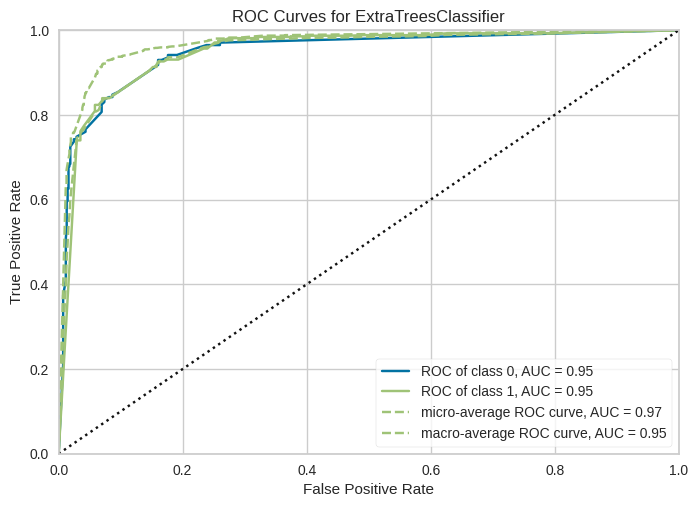

In [49]:
plot_model(best, plot = 'auc')

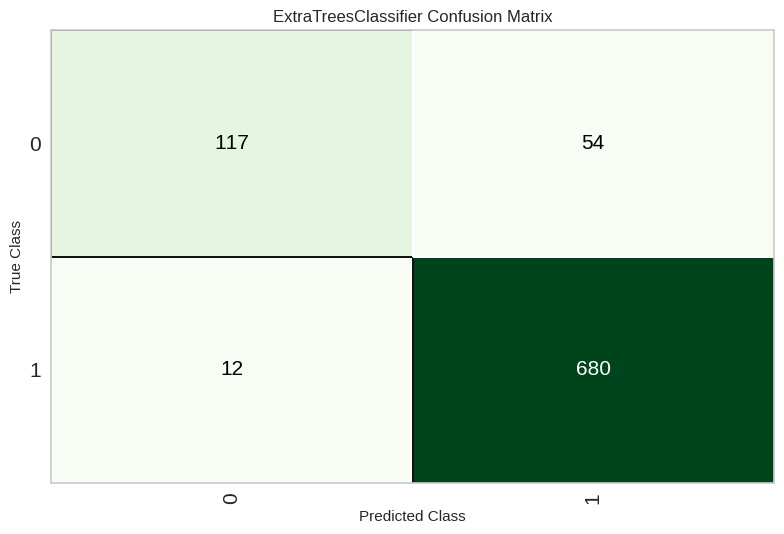

In [51]:
plot_model(best, plot = 'confusion_matrix')

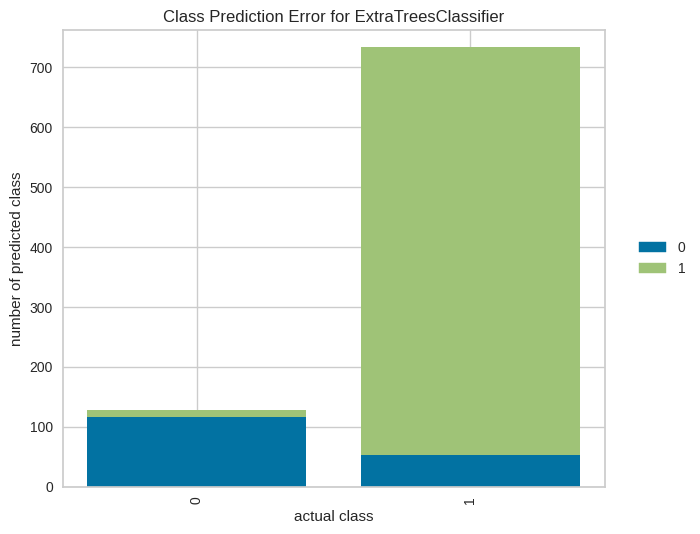

In [55]:
plot_model(best, plot = 'error')

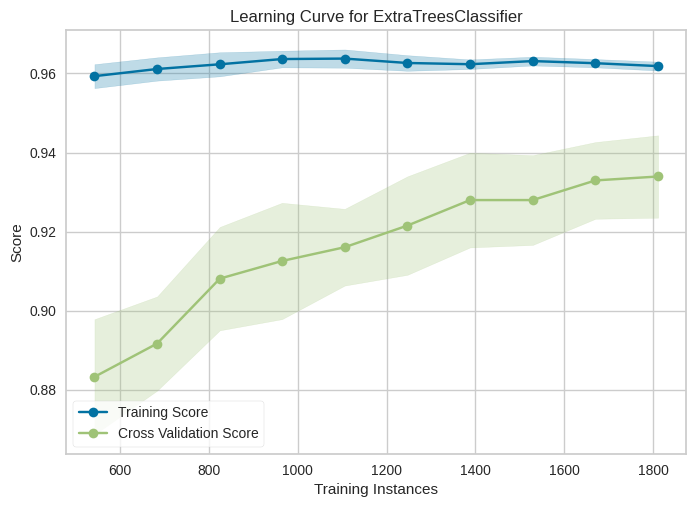

In [56]:
plot_model(best, plot = 'learning')

In [60]:
predictions = predict_model(best, data = df)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9503,0.9759,0.9918,0.9486,0.9697,0.8319,0.8383


,Recency,Frequency,Time,Class,prediction_label,prediction_score
0,2,50,98,1,1,1.00
1,2,50,98,1,1,1.00
2,2,50,98,1,1,1.00
3,2,50,98,1,1,1.00
4,2,50,98,1,1,1.00
...,...,...,...,...,...,...
2871,23,2,38,0,0,1.00
2872,21,2,52,0,0,1.00
2873,23,3,62,0,0,0.99
2874,39,1,39,0,0,1.00
